{'fx_competent': 1.1589875140747969, 'Kcompetitor': 1000000.0, 'K': 100.0, 'dH': -596506.96561594075, 'fx2': 1.5145075611306127, 'dHcompetitor': -634239.58931162825, 'dilution_heat': 223476.83277237552, 'dil2': 20698.217104725682}


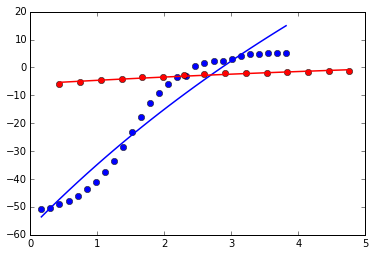

In [3]:
# Imports
import pytc
%matplotlib inline

# Set up the global fit with parameter guesses
fitter = pytc.GlobalFit({"K":1e6,"dH":-2000,"fx_competent":1.0, "dilution_heat":0.0,
                         "Kcompetitor":1e6,"dHcompetitor":-2000,"fx2":1.0,"dil2":0.0},{"K":1e2})

# Load in an experiment
e1 = pytc.ITCExperiment("test-data/hA5A5conTESCaTCEP.DH",pytc.models.SingleSite)

# Associate the global K1 parameter with the local KA parameter, etc.
fitter.add_experiment(e1) #,dilution_heat=10000.0)

# Load in another experiment
e2 = pytc.ITCExperiment("test-data/hA5NCX1TESCaTCEP.DH",pytc.models.SingleSite)
fitter.add_experiment(e2,{"Kcompetitor":"K",
                          "dHcompetitor":"dH",
                          "fx2":"fx_competent",
                          "dil2":"dilution_heat"})

# Do the global fit
fitter.fit()

# Plot the fit
fitter.plot()

# Print out the final fit parameters
print(fitter.fit_param)